## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
## Draw the inferences from the clusters obtained.


## Data Description:
 
#### The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

## IMport LIbrary

In [70]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [72]:
df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})
df= df.drop('ID',axis=1)

In [73]:
df.head(4)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0


In [74]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [45]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,0:])

In [75]:
# create dendrogram
#dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [76]:
df_norm.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494,0.118678
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256,0.094606
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457,0.193443
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332,-0.030367
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484,-0.014523
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506,0.200014
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893,0.250395
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715,0.210437
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909,0.231105
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121,0.126853


In [77]:
# create clusters
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward').fit_predict(df_norm)

In [78]:
df['Clusters']=clusters_labels

In [79]:
df=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]

In [80]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


<AxesSubplot:xlabel='Clusters', ylabel='Density'>

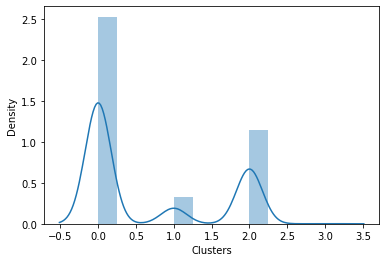

In [81]:
sn.distplot(df['Clusters'])

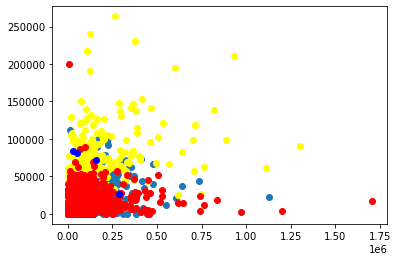

In [82]:
df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
df4 = df[df.Clusters==3]
plt.scatter(df1.Balance,df1['Bonus_miles'],cmap="green")
plt.scatter(df2.Balance,df2['Bonus_miles'],color='yellow')
plt.scatter(df3.Balance,df3['Bonus_miles'],color='red')
plt.scatter(df4.Balance,df4['Bonus_miles'],color='blue')

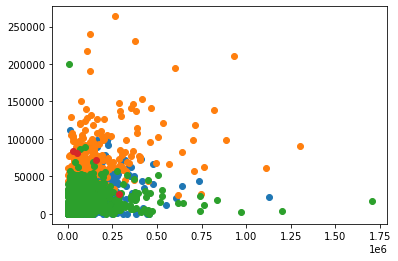

In [83]:
plt.scatter(df1.Balance,df1['Bonus_miles'],cmap="Clusters")
plt.scatter(df2.Balance,df2['Bonus_miles'],cmap="Clusters")
plt.scatter(df3.Balance,df3['Bonus_miles'],cmap='Clusters')
plt.scatter(df4.Balance,df4['Bonus_miles'],cmap='Clusters')

In [84]:
df['Clusters'].value_counts()

0    2526
2    1144
1     325
3       4
Name: Clusters, dtype: int64

## NOW USE K-MEANS CLUSTER

In [87]:
kmeans= KMeans(n_clusters=6,init='k-means++',random_state=54,algorithm='lloyd')

In [92]:
kmeans.fit(df.columns[1:5])

ValueError: could not convert string to float: 'Qual_miles'